IMPORTS

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
from sklearn.linear_model import LogisticRegression as logi
from sklearn.model_selection import train_test_split as tts
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier as Ext
from sklearn.preprocessing import LabelEncoder
import joblib as jb
from sklearn.svm import SVC as svc
from sklearn.model_selection import cross_val_score as cvs
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn.cluster import KMeans

DATASET LOADING

In [19]:
data=load_iris()
df=pd.DataFrame(data=data.data,columns=data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


BREAKING THE DATASET

In [20]:
df1=df.drop(["sepal length (cm)","sepal width (cm)"],axis=1)
df2=df.drop(["petal length (cm)","petal width (cm)"],axis=1)

PLOTTING THE DATA TO VISUALISE CLUSTERS

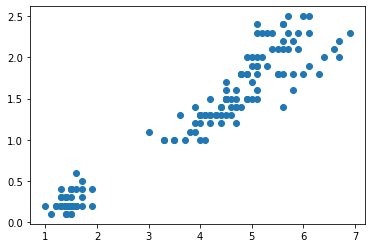

In [21]:
plt.scatter(df["petal length (cm)"],df["petal width (cm)"])
plt.show()

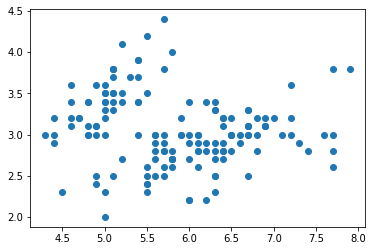

In [22]:
plt.scatter(df["sepal length (cm)"],df["sepal width (cm)"])
plt.show()

SCALING THE DATA

In [23]:
sc=mms()
sc.fit(df1[["petal length (cm)"]])
df1["plen"]=sc.transform(df1[["petal length (cm)"]])
sc.fit(df1[["petal width (cm)"]])
df1["pwidth"]=sc.transform(df1[["petal width (cm)"]])
df1

,petal length (cm),petal width (cm),plen,pwidth
0,1.4,0.2,0.067797,0.041667
1,1.4,0.2,0.067797,0.041667
2,1.3,0.2,0.050847,0.041667
3,1.5,0.2,0.084746,0.041667
4,1.4,0.2,0.067797,0.041667
...,...,...,...,...
145,5.2,2.3,0.711864,0.916667
146,5.0,1.9,0.677966,0.750000
147,5.2,2.0,0.711864,0.791667
148,5.4,2.3,0.745763,0.916667


In [24]:
sc.fit(df2[["sepal length (cm)"]])
df2["slen"]=sc.transform(df2[["sepal length (cm)"]])
sc.fit(df2[["sepal width (cm)"]])
df2["swidth"]=sc.transform(df2[["sepal width (cm)"]])
df2

,sepal length (cm),sepal width (cm),slen,swidth
0,5.1,3.5,0.222222,0.625000
1,4.9,3.0,0.166667,0.416667
2,4.7,3.2,0.111111,0.500000
3,4.6,3.1,0.083333,0.458333
4,5.0,3.6,0.194444,0.666667
...,...,...,...,...
145,6.7,3.0,0.666667,0.416667
146,6.3,2.5,0.555556,0.208333
147,6.5,3.0,0.611111,0.416667
148,6.2,3.4,0.527778,0.583333


VISUALISATION OF THE SCALED DATA (BLUE IS PETAL ORANGE IS SEPAL)

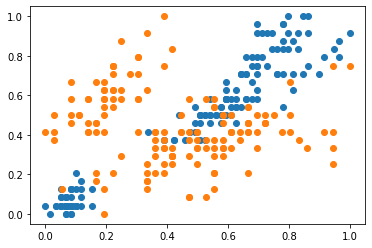

In [25]:
plt.scatter(df1["plen"],df1["pwidth"])
plt.scatter(df2["slen"],df2["swidth"])
plt.show()

ELBOW PLOTTING OF THE DATA

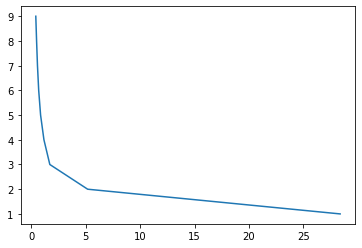

In [26]:
er=list()
for i in range(1,10):
  kms=KMeans(n_clusters=i)
  kms.fit(df1[["plen","pwidth"]])
  er.append(kms.inertia_)
plt.plot(er, range(1,10))
plt.show()

CLUSTERING

In [27]:
kms=KMeans(n_clusters=3)
obt_tar=kms.fit_predict(df1[["plen","pwidth"]])
df1["class"]=data.target
df1["obt_class"]=obt_tar
df1

,petal length (cm),petal width (cm),plen,pwidth,class,obt_class
0,1.4,0.2,0.067797,0.041667,0,1
1,1.4,0.2,0.067797,0.041667,0,1
2,1.3,0.2,0.050847,0.041667,0,1
3,1.5,0.2,0.084746,0.041667,0,1
4,1.4,0.2,0.067797,0.041667,0,1
...,...,...,...,...,...,...
145,5.2,2.3,0.711864,0.916667,2,0
146,5.0,1.9,0.677966,0.750000,2,0
147,5.2,2.0,0.711864,0.791667,2,0
148,5.4,2.3,0.745763,0.916667,2,0


ACCURACY CHECKING BY COMAPRING

In [28]:
eval=df1.where(df1["class"]!=df1["obt_class"])
eval=eval.dropna()
eval

,petal length (cm),petal width (cm),plen,pwidth,class,obt_class
0,1.4,0.2,0.067797,0.041667,0.0,1.0
1,1.4,0.2,0.067797,0.041667,0.0,1.0
2,1.3,0.2,0.050847,0.041667,0.0,1.0
3,1.5,0.2,0.084746,0.041667,0.0,1.0
4,1.4,0.2,0.067797,0.041667,0.0,1.0
...,...,...,...,...,...,...
145,5.2,2.3,0.711864,0.916667,2.0,0.0
146,5.0,1.9,0.677966,0.750000,2.0,0.0
147,5.2,2.0,0.711864,0.791667,2.0,0.0
148,5.4,2.3,0.745763,0.916667,2.0,0.0


SAME FOR SEPAL SET

In [29]:
kms=KMeans(n_clusters=3)
obt_tar2=kms.fit_predict(df2[["slen","swidth"]])
df2["class"]=data.target
df2["obt_class"]=obt_tar2
df2

,sepal length (cm),sepal width (cm),slen,swidth,class,obt_class
0,5.1,3.5,0.222222,0.625000,0,1
1,4.9,3.0,0.166667,0.416667,0,1
2,4.7,3.2,0.111111,0.500000,0,1
3,4.6,3.1,0.083333,0.458333,0,1
4,5.0,3.6,0.194444,0.666667,0,1
...,...,...,...,...,...,...
145,6.7,3.0,0.666667,0.416667,2,0
146,6.3,2.5,0.555556,0.208333,2,2
147,6.5,3.0,0.611111,0.416667,2,0
148,6.2,3.4,0.527778,0.583333,2,0


DEFINING A FUNCTION TO PLOT ACTUAL CLUSTERS VS OBTAINED CLUSTERS

In [30]:
def pltCluster(dfs):
   cls=dfs["class"]
   cls2=dfs.obt_class
   dfa=dfs.where(dfs["class"]==0)
   dfb=dfs.where(dfs["class"]==1)
   dfc=dfs.where(dfs["class"]==2)
   dfa1=dfs.where(dfs.obt_class==0)
   dfb1=dfs.where(dfs.obt_class==1)
   dfc1=dfs.where(dfs.obt_class==2)
   try:
     plt.subplot(211)
     plt.scatter(dfa["petal length (cm)"],dfa["petal width (cm)"])
     plt.scatter(dfb["petal length (cm)"],dfb["petal width (cm)"])
     plt.scatter(dfc["petal length (cm)"],dfc["petal width (cm)"])
     plt.subplot(212)
     plt.scatter(dfa1["petal length (cm)"],dfa1["petal width (cm)"])
     plt.scatter(dfb1["petal length (cm)"],dfb1["petal width (cm)"])
     plt.scatter(dfc1["petal length (cm)"],dfc1["petal width (cm)"])
     plt.show()
   except:
     plt.subplot(211)
     plt.scatter(dfa["sepal length (cm)"],dfa["sepal width (cm)"])
     plt.scatter(dfb["sepal length (cm)"],dfb["sepal width (cm)"])
     plt.scatter(dfc["sepal length (cm)"],dfc["sepal width (cm)"])
     plt.subplot(212)
     plt.scatter(dfa1["sepal length (cm)"],dfa1["sepal width (cm)"])
     plt.scatter(dfb1["sepal length (cm)"],dfb1["sepal width (cm)"])
     plt.scatter(dfc1["sepal length (cm)"],dfc1["sepal width (cm)"])
     plt.show()

CLUSTERS

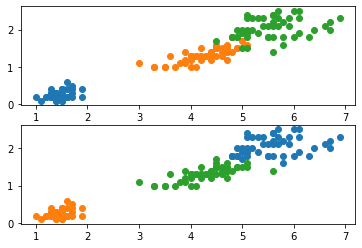

In [31]:
#For petal
pltCluster(df1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


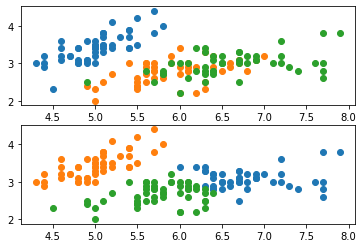

In [32]:

#For sepal
pltCluster(df2)